In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import tree, svm, datasets
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("DGA_dataset3.csv")

In [3]:
df.head()

,H2,CH4,C2H2,C2H4,C2H6,CH4/H2,C2H2/C2H4,C2H4/C2H6,C2H4/CH4,C2H2/CH4,C2H2/H2,%CH4,%C2H2,%C2H4,%H2,%C2H6,Decision
0,3930.0,2397.0,0.0,0.0,157.0,0.609924,0.000000,0.000000,0.000000,0.000000,0.000000,36.967921,0.000000,0.000000,60.610734,2.421345,1
1,37800.0,1740.0,8.0,8.0,249.0,0.046032,1.000000,0.032129,0.004598,0.004598,0.000212,4.371310,0.020098,0.020098,94.962944,0.625550,1
2,92600.0,10200.0,0.0,0.0,0.0,0.110151,0.000000,0.000000,0.000000,0.000000,0.000000,9.922179,0.000000,0.000000,90.077821,0.000000,1
3,8266.0,1061.0,0.0,0.0,22.0,0.128357,0.000000,0.000000,0.000000,0.000000,0.000000,11.348807,0.000000,0.000000,88.415873,0.235319,1
4,9340.0,995.0,7.0,6.0,60.0,0.106531,1.166667,0.100000,0.006030,0.007035,0.000749,9.559954,0.067256,0.057648,89.738663,0.576480,1


In [4]:
df.info

<bound method DataFrame.info of           H2      CH4    C2H2     C2H4     C2H6    CH4/H2  C2H2/C2H4  \
0     3930.0   2397.0     0.0      0.0    157.0  0.609924   0.000000   
1    37800.0   1740.0     8.0      8.0    249.0  0.046032   1.000000   
2    92600.0  10200.0     0.0      0.0      0.0  0.110151   0.000000   
3     8266.0   1061.0     0.0      0.0     22.0  0.128357   0.000000   
4     9340.0    995.0     7.0      6.0     60.0  0.106531   1.166667   
..       ...      ...     ...      ...      ...       ...        ...   
196  24700.0  61000.0  1560.0  42100.0  26300.0  2.469636   0.037055   
197     14.0     44.0     1.0      7.0    124.0  3.142857   0.142857   
198   2031.0    149.0     0.0      3.0     20.0  0.073363   0.000000   
199    480.0   1075.0     0.0   1132.0    298.0  2.239583   0.000000   
200  40000.0    400.0     6.0    600.0     70.0  0.010000   0.010000   

     C2H4/C2H6  C2H4/CH4  C2H2/CH4   C2H2/H2       %CH4     %C2H2      %C2H4  \
0     0.000000  0.00000

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Decision',axis=1),df['Decision'],random_state = 1, test_size=0.1)

In [6]:
X_train.shape,X_test.shape

((180, 16), (21, 16))

In [7]:
y_train.shape,y_test.shape

((180,), (21,))

In [8]:
clf = tree.DecisionTreeClassifier(criterion= 'gini', max_depth = 9, min_samples_split=2, min_samples_leaf=1, random_state=0)

clf = clf.fit(X_train,y_train)
#classifier = svm.SVC(kernel='linear', C=0.1).fit(X_train, y_train)

In [9]:
clf.feature_importances_

array([0.00443758, 0.05143265, 0.        , 0.01098988, 0.        ,
       0.        , 0.44980591, 0.04687947, 0.22387864, 0.08091664,
       0.01348246, 0.00952457, 0.        , 0.        , 0.1086522 ,
       0.        ])

In [10]:
for feature,importancia in zip(df.columns,clf.feature_importances_):
            print('{}:{}' .format(feature, importancia))

H2:0.004437581626247391
CH4:0.0514326533851893
C2H2:0.0
C2H4:0.010989883201963513
C2H6:0.0
CH4/H2:0.0
C2H2/C2H4:0.44980590929143505
C2H4/C2H6:0.04687947089304808
C2H4/CH4:0.2238786359600673
C2H2/CH4:0.08091663577241064
C2H2/H2:0.013482462593736597
%CH4:0.009524565441701723
%C2H2:0.0
%C2H4:0.0
%H2:0.10865220183420042
%C2H6:0.0


In [11]:
resultado = clf.predict(X_test)
resultado

array([5, 1, 3, 3, 2, 4, 3, 3, 1, 2, 5, 3, 2, 2, 4, 5, 3, 5, 5, 3, 3],
      dtype=int64)

In [12]:
from sklearn import metrics

print(metrics.classification_report(y_test,resultado,zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         8
           3       0.50      1.00      0.67         4
           4       1.00      0.50      0.67         4
           5       0.60      1.00      0.75         3

    accuracy                           0.71        21
   macro avg       0.82      0.80      0.75        21
weighted avg       0.85      0.71      0.71        21



In [13]:
import pydot
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz 2.44.1\bin'

In [14]:
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names = df.drop('Decision',axis = 1).columns,
    class_names = ['PD','D1','D2','T1|T2','T3'],
    filled= False, rounded=True,
    proportion = False,
    rotate = False,
    label ='root',
    special_characters = False,
    max_depth = 9,
    impurity = False,
    node_ids = False
    )
graph = graphviz.Source(dot_data, format = "png")
graph.render('plot')

'plot.png'

In [15]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [16]:


# feature matrix
X,y = df.drop('Decision',axis=1),df['Decision']

# feature labels
features_label = df.drop('Decision',axis=1).columns

# class label
class_label = ['PD','D1','D2','T1|T2','T3']

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)

    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names = class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator


inter=interactive(plot_tree 
   ,  crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[9
           ]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5),
    figsize=(15,7.5))


display(inter)



interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [17]:
graph.render('inter')

'inter.png'

Confusion matrix, without normalization
[[16  0  0  0  0]
 [ 0 45  4  0  0]
 [ 0  0 54  0  0]
 [ 0  0  0 42  2]
 [ 0  0  0  0 38]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.         0.91836735 0.08163265 0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.95454545 0.04545455]
 [0.         0.         0.         0.         1.        ]]


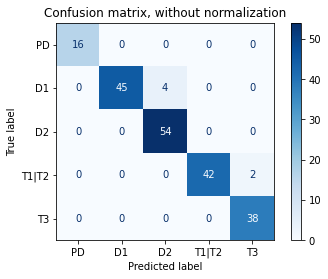

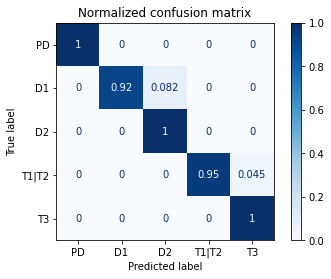

In [18]:
class_names = ['PD','D1','D2','T1|T2','T3']


titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X, y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [19]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [29]:
def visualize_fronteiras(msamples_split,max_depth):
    X = df[['%C2H2','%C2H4']].values
    y = df.Decision.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(8,6))
    ax = plot_decision_regions(X, y, clf=tree, legend=0)

    plt.xlabel('%C2H2')
    plt.ylabel('%C2H4')
    plt.title('Decision Tree')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['D1', 'D2', 'PD','T1|T2','T3'],framealpha=0.3, scatterpoints=1)
    
    plt.show()


c:\users\engma\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:280: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


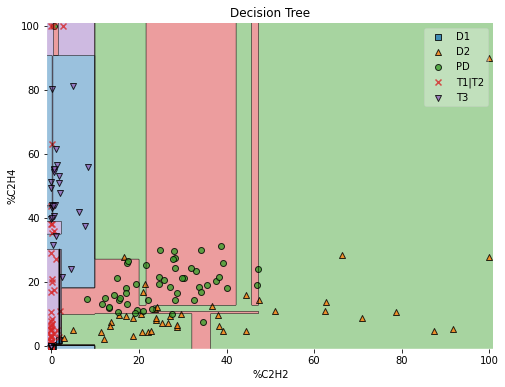

In [30]:
visualize_fronteiras(2,max_depth=9)

In [33]:
def visualize_fronteiras(msamples_split,max_depth):
    X = df[['%CH4','%H2']].values
    y = df.Decision.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(8,6))
    ax = plot_decision_regions(X, y, clf=tree, legend=0)

    plt.xlabel('%CH4')
    plt.ylabel('%H2')
    plt.title('Decision Tree')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['D1', 'D2', 'PD','T1|T2','T3'],framealpha=0.3, scatterpoints=1)
    
    plt.show()


c:\users\engma\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:280: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


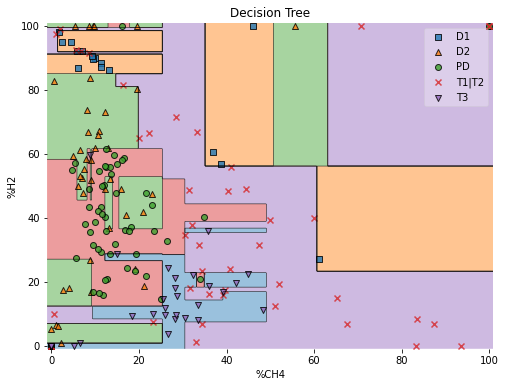

In [34]:
visualize_fronteiras(2,max_depth=9)

In [35]:
def visualize_fronteiras(msamples_split,max_depth):
    X = df[['%C2H2','%CH4']].values
    y = df.Decision.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(8,6))
    ax = plot_decision_regions(X, y, clf=tree, legend=0)

    plt.xlabel('%C2H2')
    plt.ylabel('%CH4')
    plt.title('Decision Tree')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['D1', 'D2', 'PD','T1|T2','T3'],framealpha=0.3, scatterpoints=1)
    
    plt.show()


c:\users\engma\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:280: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


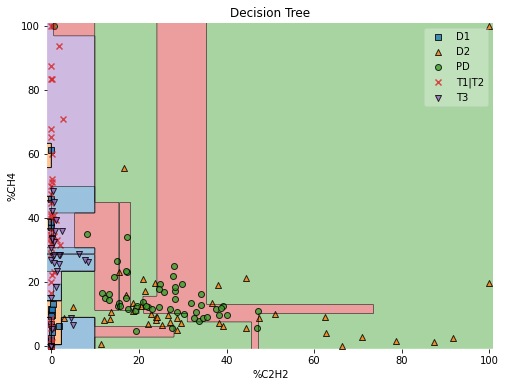

In [36]:
visualize_fronteiras(2,max_depth=9)

In [37]:
def visualize_fronteiras(msamples_split,max_depth):
    X = df[['%C2H6','%C2H2']].values
    y = df.Decision.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(8,6))
    ax = plot_decision_regions(X, y, clf=tree, legend=0)

    plt.xlabel('%C2H6')
    plt.ylabel('%C2H2')
    plt.title('Decision Tree')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['D1', 'D2', 'PD','T1|T2','T3'],framealpha=0.3, scatterpoints=1)
    
    plt.show()

c:\users\engma\appdata\local\programs\python\python37\lib\site-packages\mlxtend\plotting\decision_regions.py:280: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  **scatter_kwargs)


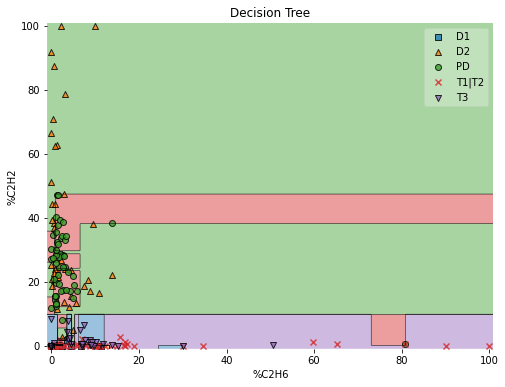

In [38]:
visualize_fronteiras(2,max_depth=9)